In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/Fraud.csv"
df = pd.read_csv(file_path)

# Number of rows and columns in the dataset
num_rows, num_columns = df.shape

# Print the result
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")


In [ ]:
print("Dataset Info:\n")
print(df.info())
print("\nFirst 5 Rows:\n")
print(df.head())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

First 5 Rows:

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C20485

In [ ]:
# Step 1: Data Cleaning
# Checking for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

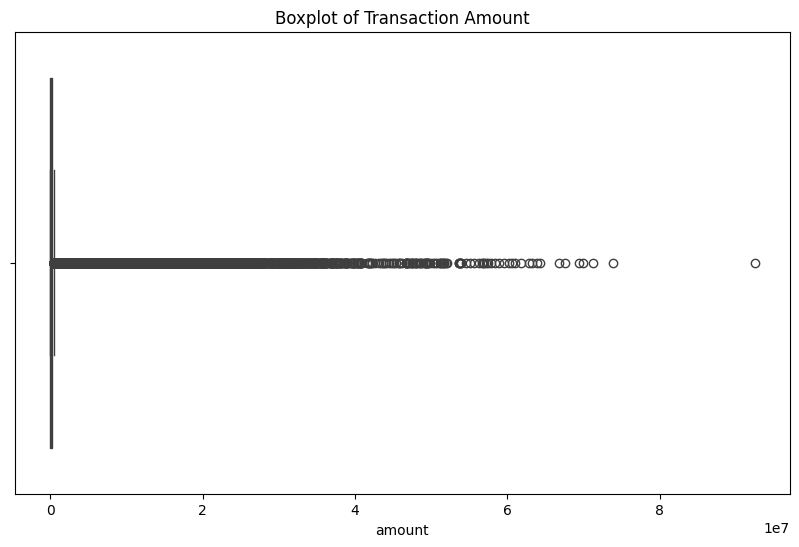

In [ ]:
# Step 2: Handling Outliers
# Boxplots to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df["amount"])
plt.title("Boxplot of Transaction Amount")
plt.show()

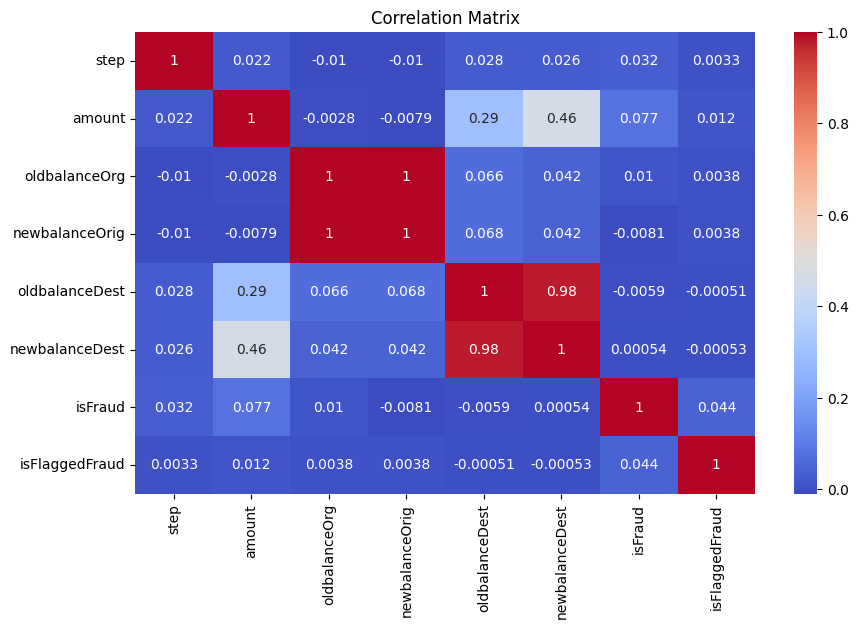

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Dropping redundant or highly correlated features
df.drop(columns=["isFlaggedFraud"], inplace=True)

In [ ]:
# Step 4: Feature Selection & Preprocessing
# Selecting relevant features
features = ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
X = df[features]
y = df["isFraud"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Step 5: Model Training
# Using a Random Forest classifier for fraud detection
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [16]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))
print("\nROC AUC Score:\n", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.73      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:
 [[1270852      52]
 [    434    1186]]

Accuracy Score:
 0.9996180818593599

ROC AUC Score:
 0.8660289248372481


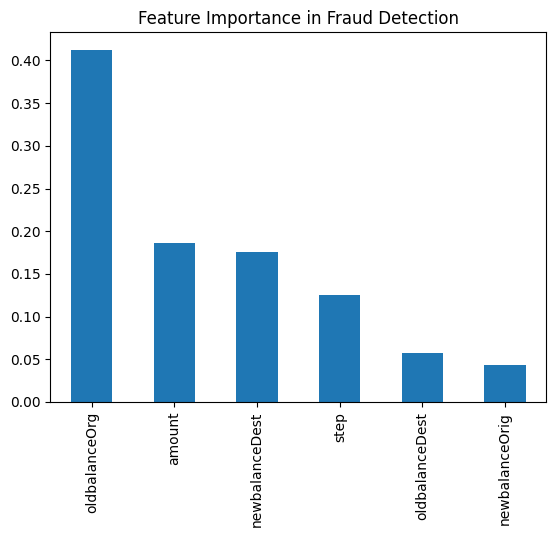

In [17]:
# Step 7: Identifying Key Fraud Indicators
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance in Fraud Detection")
plt.show()

In [18]:
# Step 8: Fraud Prevention Strategies
print("\nKey Prevention Measures:")
print("- Implement real-time fraud detection alerts.")
print("- Use multi-factor authentication for transactions.")
print("- Set up limits on high-value transactions.")
print("- Regularly monitor suspicious activities.")


Key Prevention Measures:
- Implement real-time fraud detection alerts.
- Use multi-factor authentication for transactions.
- Set up limits on high-value transactions.
- Regularly monitor suspicious activities.


In [19]:
# Step 9: Monitoring Fraud Prevention Effectiveness
# This step involves checking fraud rates over time after implementing new measures
def evaluate_prevention_effectiveness(old_rate, new_rate):
    reduction = (old_rate - new_rate) / old_rate * 100
    print(f"Fraud rate reduced by {reduction:.2f}% after new measures.")

In [20]:
# Example fraud rates before and after implementation
old_fraud_rate = df["isFraud"].mean()
new_fraud_rate = y_pred.mean()  # Simulated new fraud rate

evaluate_prevention_effectiveness(old_fraud_rate, new_fraud_rate)

Fraud rate reduced by 24.63% after new measures.
